<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Code_challenge.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>


# Unsupervised Learning Project

### Project Title: 
#### Done By: By Alex Masina & Nthabiseng Moyeni

© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

---

Recommender systems are used by many streaming companies to recommend content to customers based on their viewing preferences. This project aims to use a similar system to build a recommender model to acurately predict how a user will rate an anime title they have not yet viewed.

---
<a href=#three></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.

---

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import streamlit as st
import joblib, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MultiLabelBinarizer
from scipy.sparse import hstack
import numpy as np
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.model_selection import GridSearchCV



---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.

---

In [ ]:
anime_data_data_data = pd.read_csv('anime.csv')
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')


In [5]:
# Inspect the datasets
print(anime_data.head())
print(train_data.head())
print(test_data.head())

   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  
   user_id  anime_id  rating
0        1     11617      10
1        1     11757      10
2        1     15451      10
3        2     11771      10
4

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Include steps for handling missing values, removing outliers, correcting errors, and possibly reducing the data (filtering based on certain criteria or features).
---

In [6]:
# Inspect the columns in the DataFrame
print(train_data.columns)


Index(['user_id', 'anime_id', 'rating'], dtype='object')


In [9]:
# Merge train_data with anime_data to get titles
merged_train_data = pd.merge(train_data, anime_data, on='anime_id')
merged_test_data = pd.merge(test_data, anime_data, on='anime_id')

# Inspect the columns to ensure titles are included
print(merged_train_data.columns)
print(merged_test_data.columns)


Index(['user_id', 'anime_id', 'rating_x', 'name', 'genre', 'type', 'episodes',
       'rating_y', 'members'],
      dtype='object')
Index(['user_id', 'anime_id', 'name', 'genre', 'type', 'episodes', 'rating',
       'members'],
      dtype='object')


In [ ]:
# Inspect the columns in the merged_train_data DataFrame
merged_train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5703553 entries, 0 to 5703552
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   int64  
 1   anime_id  int64  
 2   rating_x  int64  
 3   name      object 
 4   genre     object 
 5   type      object 
 6   episodes  object 
 7   rating_y  float64
 8   members   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 391.6+ MB


---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---

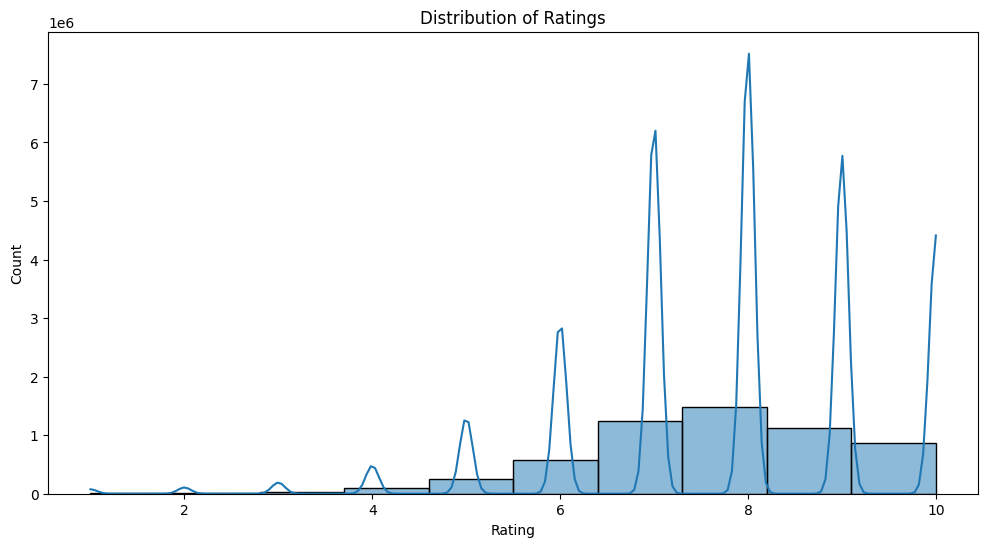

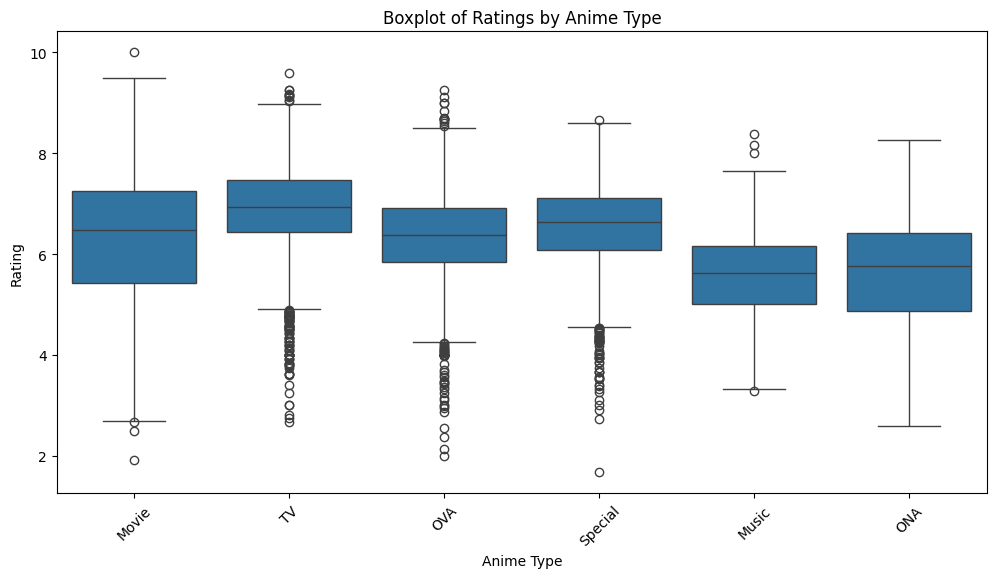

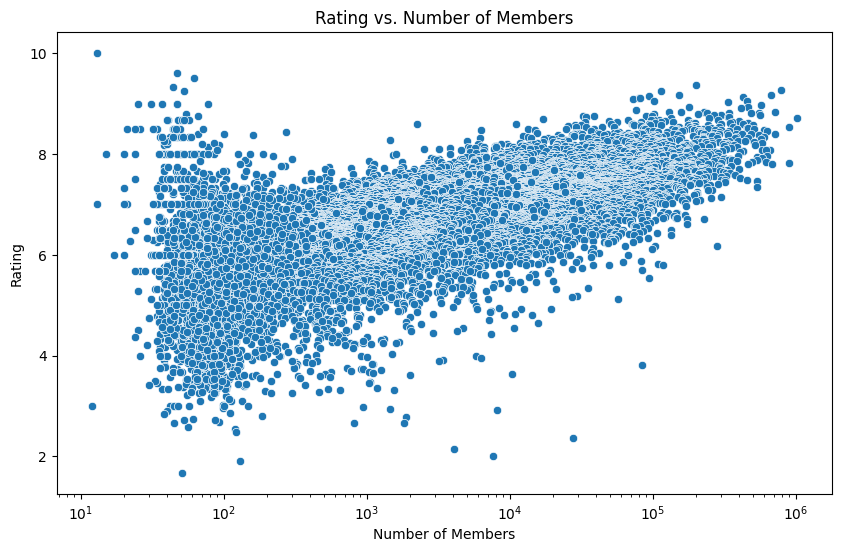

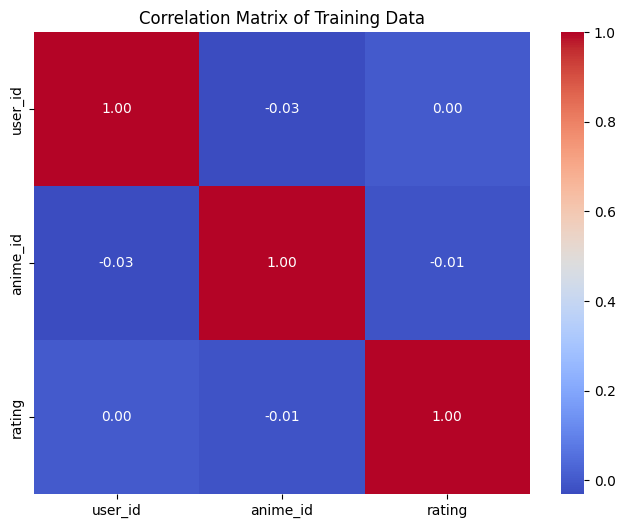

In [18]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.histplot(train_data['rating'], bins=10, kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='rating', data=anime_data)
plt.title('Boxplot of Ratings by Anime Type')
plt.xlabel('Anime Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='members', y='rating', data=anime_data)
plt.title('Rating vs. Number of Members')
plt.xlabel('Number of Members')
plt.ylabel('Rating')
plt.xscale('log')
plt.show()

corr_matrix = train_data.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Training Data')
plt.show()

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [ ]:
# Preprocess the data
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(merged_train_data['name'])
y_train = merged_train_data['rating_x']
X_test = vectorizer.transform(merged_test_data['name'])
y_test = merged_test_data['rating']

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [9]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')


RMSE: 0.20273655031875265


In [10]:
# Fill missing genres with an empty string
merged_train_data['genre'] = merged_train_data['genre'].fillna('')
merged_test_data['genre'] = merged_test_data['genre'].fillna('')

# Encode genres
mlb = MultiLabelBinarizer()
genre_encoded_train = mlb.fit_transform(merged_train_data['genre'].str.split(','))
genre_encoded_test = mlb.transform(merged_test_data['genre'].str.split(','))

# Combine TF-IDF and genre features
X_train_combined = hstack([X_train, genre_encoded_train])
X_test_combined = hstack([X_test, genre_encoded_test])

# Train the model with combined features
model.fit(X_train_combined, y_train)

# Make predictions
y_pred_combined = model.predict(X_test_combined)

# Evaluate the model
rmse_combined = mean_squared_error(y_test, y_pred_combined, squared=False)
print(f'RMSE with combined features: {rmse_combined}')




RMSE with combined features: 0.19388450474463623


In [11]:
# Replace non-numeric values with the median number of episodes
median_episodes = merged_train_data[merged_train_data['episodes'] != 'Unknown']['episodes'].astype(float).median()
merged_train_data['episodes'] = merged_train_data['episodes'].replace('Unknown', median_episodes).astype(float)
merged_test_data['episodes'] = merged_test_data['episodes'].replace('Unknown', median_episodes).astype(float)

# Normalize number of episodes
scaler = StandardScaler()
episodes_scaled_train = scaler.fit_transform(merged_train_data[['episodes']])
episodes_scaled_test = scaler.transform(merged_test_data[['episodes']])

# Combine all features
type_encoded_train = pd.get_dummies(merged_train_data['type'])
type_encoded_test = pd.get_dummies(merged_test_data['type'])
X_train_combined = hstack([X_train, genre_encoded_train, type_encoded_train, episodes_scaled_train])
X_test_combined = hstack([X_test, genre_encoded_test, type_encoded_test, episodes_scaled_test])

# Train the model with combined features
model.fit(X_train_combined, y_train)

# Make predictions
y_pred_combined = model.predict(X_test_combined)

# Evaluate the model
rmse_combined = mean_squared_error(y_test, y_pred_combined, squared=False)
print(f'RMSE with additional features: {rmse_combined}')



RMSE with additional features: 0.19084488246164663


In [12]:
# Combine all features
X_train_combined = hstack([X_train, genre_encoded_train, type_encoded_train, episodes_scaled_train])
X_test_combined = hstack([X_test, genre_encoded_test, type_encoded_test, episodes_scaled_test])

# Define XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1)

# Hyperparameter tuning (example)
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train_combined, y_train)

# Best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred_combined = best_model.predict(X_test_combined)

# Evaluate the model
rmse_combined = mean_squared_error(y_test, y_pred_combined, squared=False)
print(f'RMSE with XGBoost and additional features: {rmse_combined}')


RMSE with XGBoost and additional features: 0.3316841708887929


---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---